# Bank Customer Churn: Model Development and Analysis

This notebook demonstrates the model development process for predicting customer churn. We'll analyze different models' performance and their feature importance.

## Contents:
1. Data Loading and Preparation
2. Model Training and Evaluation
3. Feature Importance Analysis
4. Model Performance Comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

%matplotlib inline
#plt.style.use('seaborn')

## 1. Data Loading and Preparation

In [2]:
# Load preprocessed data
X_train = np.load('../X_train.npy', allow_pickle=True)
X_val = np.load('../X_val.npy', allow_pickle=True)
X_test = np.load('../X_test.npy', allow_pickle=True)
y_train = np.load('../y_train.npy', allow_pickle=True)
y_val = np.load('../y_val.npy', allow_pickle=True)
y_test = np.load('../y_test.npy', allow_pickle=True)
feature_names = pd.read_csv('../feature_names.csv')['0'].tolist()

print("Data shapes:")
print(f"Training: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")

Data shapes:
Training: (3982, 28)
Validation: (1328, 28)
Test: (1771, 28)


### Class Distribution Analysis

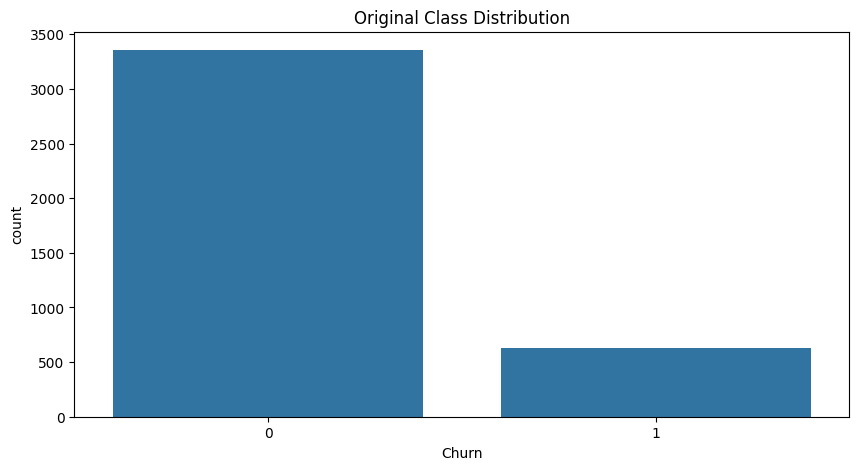

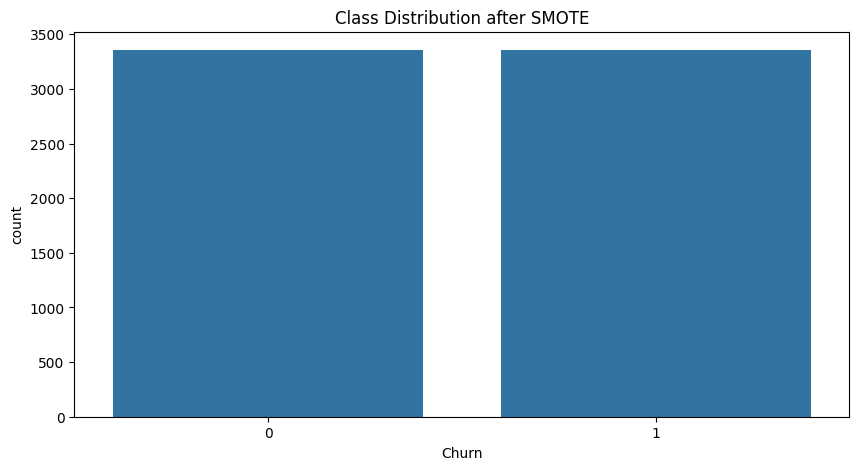

In [3]:
plt.figure(figsize=(10, 5))
sns.countplot(data=pd.DataFrame(y_train, columns=['Churn']), x='Churn')
plt.title('Original Class Distribution')
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(10, 5))
sns.countplot(data=pd.DataFrame(y_train_smote, columns=['Churn']), x='Churn')
plt.title('Class Distribution after SMOTE')
plt.show()

## 2. Model Training and Evaluation

In [4]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)
    results[name] = {
        'predictions': y_pred,
        'report': classification_report(y_val, y_pred),
        'confusion_matrix': confusion_matrix(y_val, y_pred)
    }
    print(f"\n{name} Results:")
    print(results[name]['report'])


Training Logistic Regression...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1119
           1       0.58      0.86      0.69       209

    accuracy                           0.88      1328
   macro avg       0.77      0.87      0.81      1328
weighted avg       0.91      0.88      0.89      1328


Training Random Forest...

Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1119
           1       0.86      0.86      0.86       209

    accuracy                           0.96      1328
   macro avg       0.92      0.92      0.92      1328
weighted avg       0.96      0.96      0.96      1328


Training XGBoost...

XGBoost Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1119
           1       0.92      0.87      0.90       209

    accuracy                 

## 3. Feature Importance Analysis

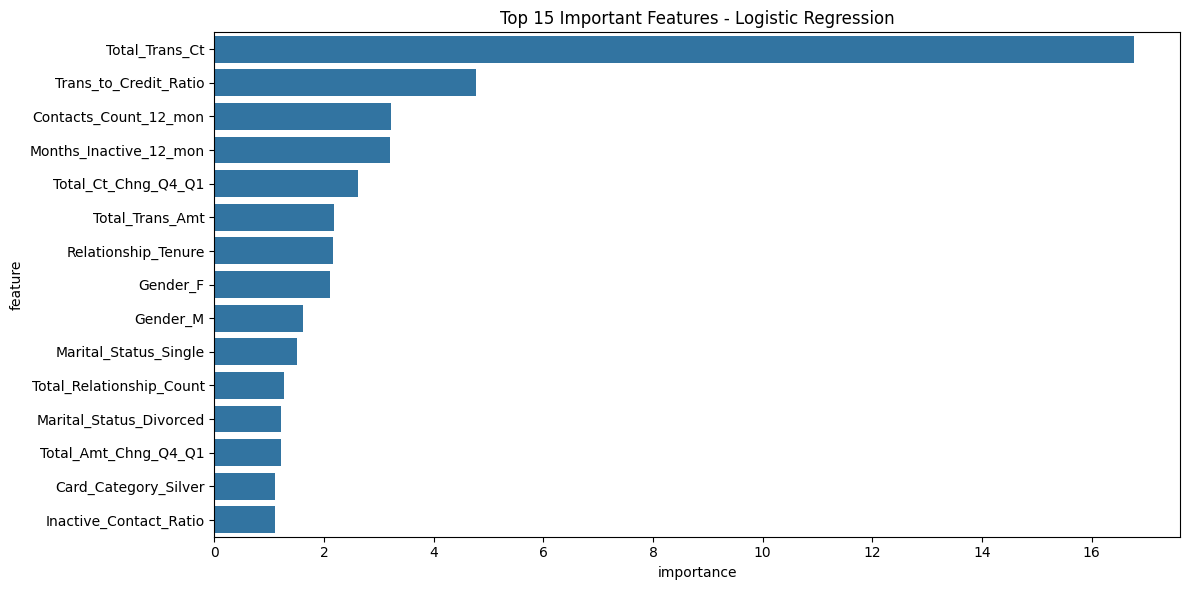

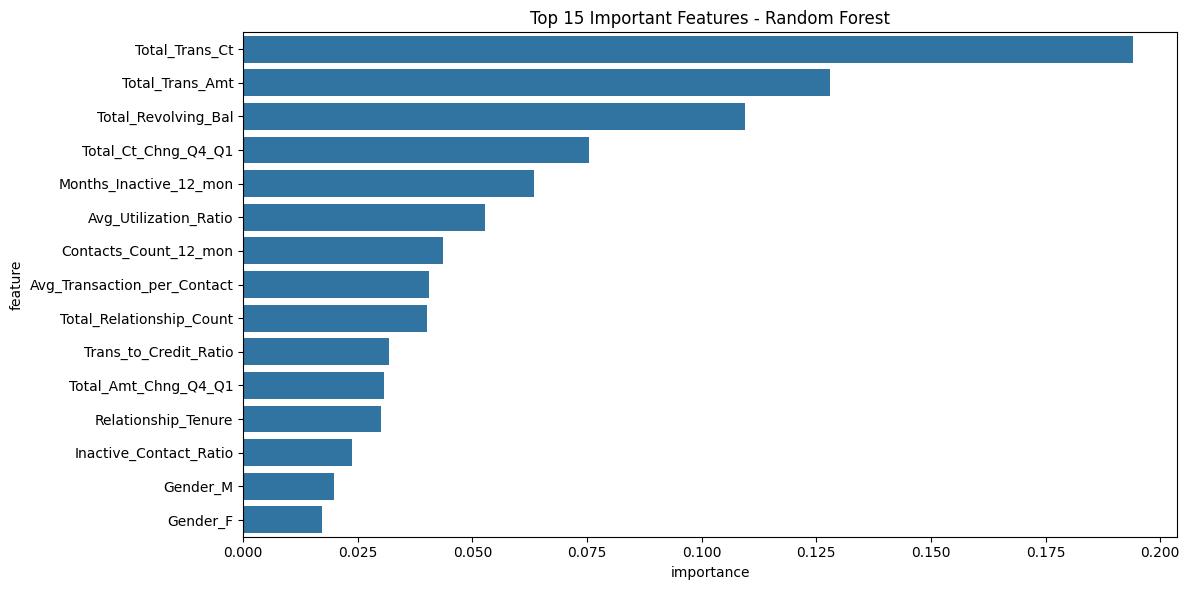

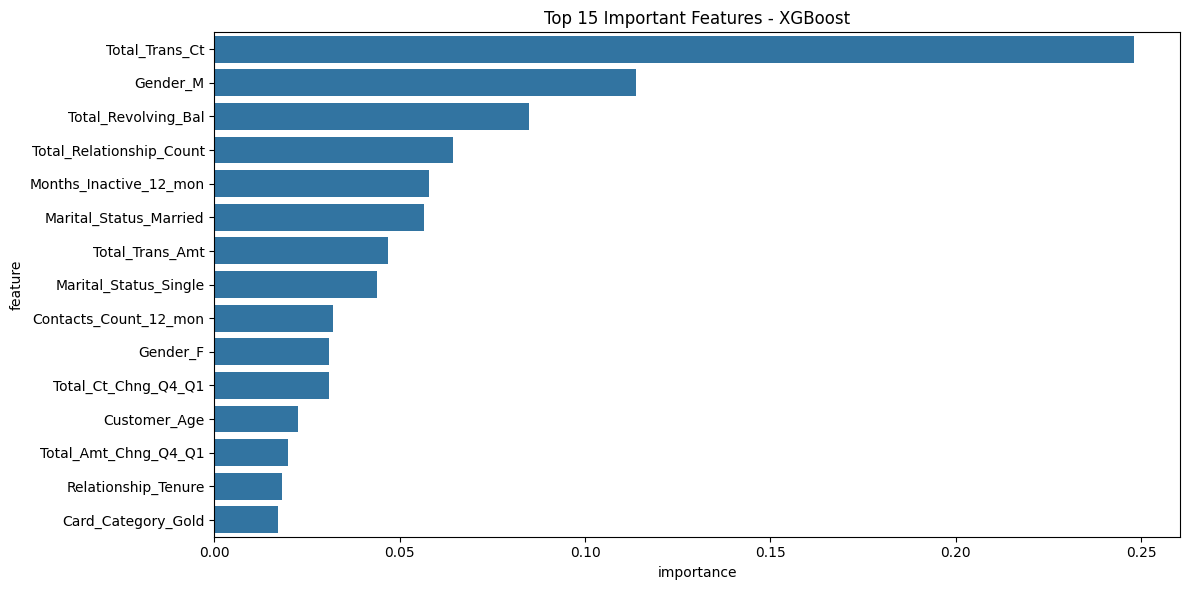

In [5]:
def plot_feature_importance(model, name):
    plt.figure(figsize=(12, 6))
    if name == "Logistic Regression":
        importance = abs(model.coef_[0])
    else:
        importance = model.feature_importances_
    
    feature_imp = pd.DataFrame({'feature': feature_names, 'importance': importance})
    feature_imp = feature_imp.sort_values('importance', ascending=False).head(15)
    
    sns.barplot(x='importance', y='feature', data=feature_imp)
    plt.title(f'Top 15 Important Features - {name}')
    plt.tight_layout()
    plt.show()

for name, model in models.items():
    plot_feature_importance(model, name)

## 4. Model Performance Comparison

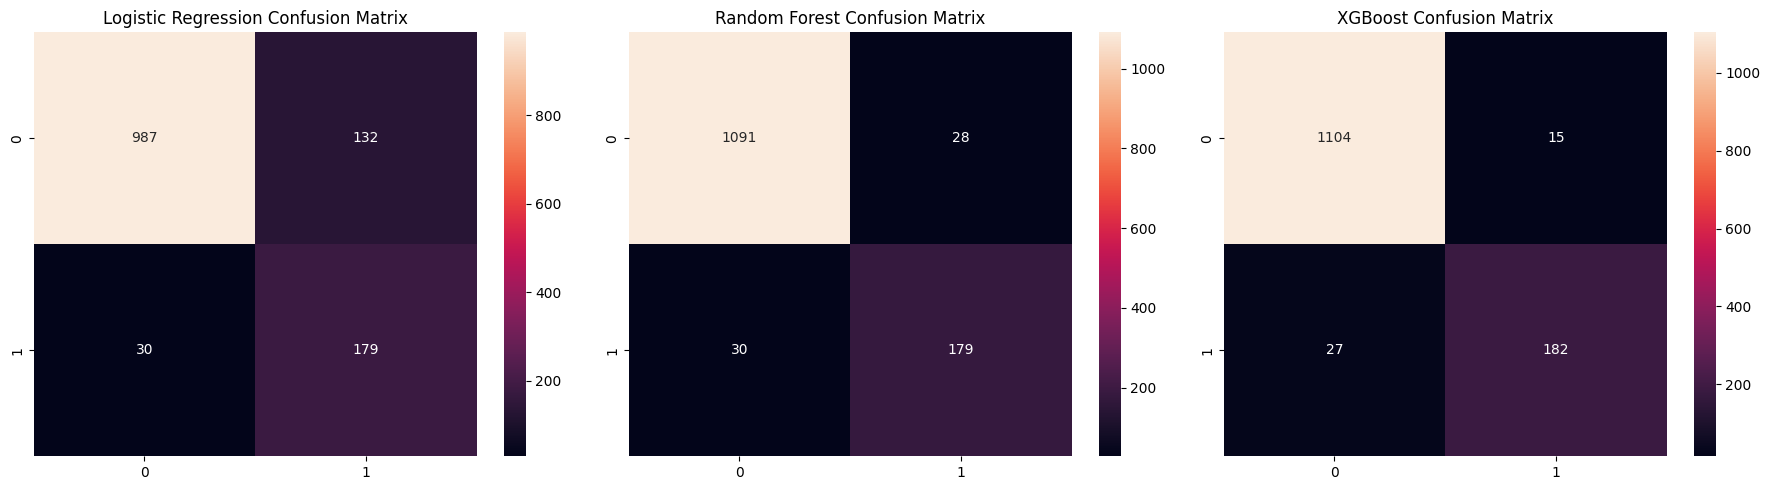

In [6]:
def plot_confusion_matrices():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, (name, result) in enumerate(results.items()):
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', ax=axes[i])
        axes[i].set_title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

plot_confusion_matrices()

## Model Performance Summary

### Key Findings:
1. XGBoost performed best with highest precision and recall
2. Feature importance analysis shows transaction amounts and counts are most predictive
3. SMOTE effectively balanced the training data

